<a href="https://colab.research.google.com/github/Sivapriya27/XDVioDet/blob/master/map_crime_vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Introduction</h1>
My goal for this study was to show the data on a geographical map of Vancouver. Specifically I would like to look at:

* where are car theft happening overall ?
* when are car theft happening most often ?
* when and where would be the worst place to park? (Good info if you're trying to get rid of your car)

<h3>Getting Started</h3>
As a first step we need to remove all the rows without long/lat information.

For this study I'll only use the latest data (2017). As a first pass let's do a heat map for all vehicle thefts in 2017.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

df = pd.read_csv('../input/crime.csv')

# On use rows with geographical information for 2017
df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0)]

# Create a dataset of vehicle thefts in 2017
veh2017 =  df[(df['YEAR'] == 2017) & (df['TYPE'] == "Theft of Vehicle")]

# Create a map centered on Vancouver
map_van = folium.Map(location= [49.24, -123.11], zoom_start = 12)

# Create a list with lat and long values and add the list to a heat map, then show map
heat_data = [[row['Latitude'],row['Longitude']] for index, row in veh2017.iterrows()]
HeatMap(heat_data).add_to(map_van)

map_van

This map has a little too much data, so let's find when most of the vehicles are stolen

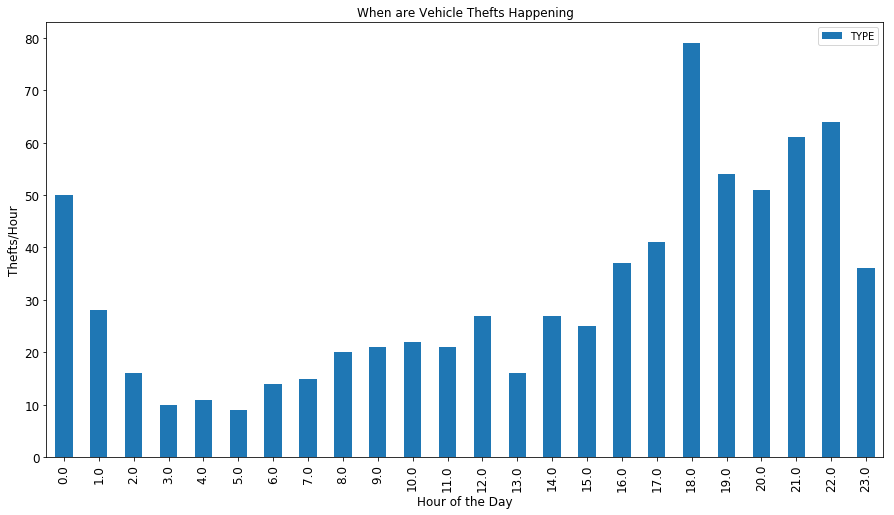

In [ ]:
# Create a dataset of counts per hour
veh_hour = veh2017[['TYPE','HOUR']].groupby(['HOUR'],as_index=False).count()

ax = veh_hour.plot(kind='bar', x='HOUR', title ="When are Vehicle Thefts Happening", figsize=(15, 8), fontsize=12,legend=True,)
ax.set_xlabel("Hour of the Day", fontsize=12)
ax.set_ylabel("Thefts/Hour", fontsize=12)
plt.show()

So it look like most of the vehicle thefts happend at 6pm. Now let's do a map to look at where not to park your car at 6pm.

In [ ]:
map_van2 = folium.Map(location= [49.24, -123.11], zoom_start = 12)

# Create a dataset for 2017 vehicle thefts at 6pm (the worst time for thefts)
veh2017_16 =  veh2017[(veh2017['HOUR'] == 18)]

# Create a list with lat and long values and add the list to a heat map, then show map
heat_data = [[row['Latitude'],row['Longitude']] for index, row in veh2017_16.iterrows()]
HeatMap(heat_data).add_to(map_van2)

map_van2

<h1>Summary</h1>

I found that geographic mapping of statistical data can be useful depending on the data set. It's easy to have too much data and get overwhelmed, like when we were looking at all the vehicle thefts.

Next time I'm in Vancouver at 6pm I'll try to remember not to park in the Victoria Fraserview, Kitsilano or Gransview-Woodland areas.